In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("output.csv")

In [8]:
df.shape

(434, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 17 columns):
party                434 non-null object
infants              434 non-null object
water                434 non-null object
budget               434 non-null object
physician            434 non-null object
salvador             434 non-null object
religious            434 non-null object
satellite            434 non-null object
aid                  434 non-null object
missile              434 non-null object
immigration          434 non-null object
synfuels             434 non-null object
education            434 non-null object
superfund            434 non-null object
crime                434 non-null object
duty_free_exports    434 non-null object
eaa_rsa              434 non-null object
dtypes: object(17)
memory usage: 57.7+ KB


In [5]:
ls

11-0.txt                gapminder.csv           knnlinreg.ipynb
Final/                  house-votes-84 (1).csv  output.csv
LINREG.ipynb            house-votes-84.csv*     pmtk3-master/
Untitled.ipynb          house-votes-84.names    pmtk3-master 2/
Untitled1.ipynb         house-votes-84.txt      pmtk3-master.zip
Untitled2.ipynb         houseknn.ipynb
diabetes.csv            knn multi.ipynb


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=6)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df =df.apply(LabelEncoder().fit_transform)

In [18]:
X = df.drop(["party"], axis = 1)
y = df["party"]

In [19]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
train = df.iloc[:400]
test = df.iloc[400:]

In [22]:
# Create arrays for the features and the response variable
y = train['party'].values
X = train.drop('party', axis=1).values

In [23]:
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [24]:
test_pred = test.drop('party', axis=1).values

In [25]:
y_pred = knn.predict(test_pred)

In [26]:
print("Prediction: {}".format(y_pred))

Prediction: [1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1]


In [27]:
actual_pred = list(test["party"])

In [28]:
y_pred = list(y_pred)

In [29]:
mis_classified=[]
for x,y in zip(actual_pred,y_pred):
    if x!=y:
        mis_classified.append(x)

In [30]:
print ((1 - (len(mis_classified)/len(y_pred)))*100)

91.17647058823529


In [31]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [32]:
digits = datasets.load_digits()

In [33]:
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

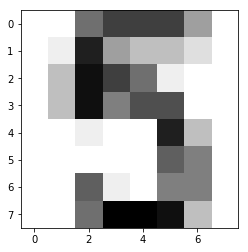

In [34]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [35]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


In [37]:
import numpy as np
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

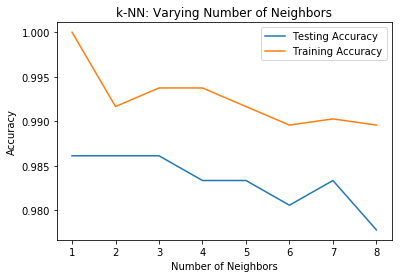

In [38]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
1,0,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
2,0,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
3,0,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2
4,0,1,2,2,1,2,2,1,1,1,1,1,1,2,2,2,2


In [40]:
from sklearn.model_selection import train_test_split as tts

In [41]:
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.3, random_state = 42)

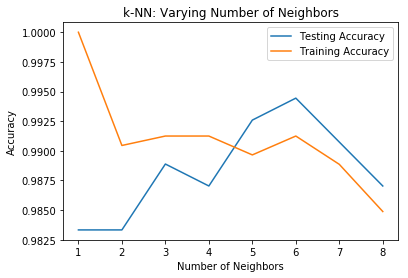

In [42]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()